# Stroke Prediction 

#### Stroke is a leading cause of death and disability worldwide. Early detection and intervention are crucial for improving patient outcomes. Machine Learning (ML) offers a promising approach to predicting stroke risk based on various factors.

#### This Jupyter Notebook aims to develop an ML model that can predict the likelihood of stroke occurrence in an individual. We will utilize a dataset containing patient information and their stroke history. The model will be trained to identify patterns in the data that are associated with stroke risk.

#### The dataset used is: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


## 1. Importing Libraries and Dataset

In [53]:
!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
#Loading the dataset 
stroke=pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke.shape

(5110, 12)

In [4]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## 2. Data Cleaning

Dropping 'id' column and dropping rows with null values

In [8]:
stroke.drop(['id'], axis=1, inplace=True)
stroke.dropna(inplace=True)

stroke.shape

(4909, 11)

In [9]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [10]:
#Search for duplicates
stroke.drop_duplicates(inplace=True)

In [11]:
stroke.shape

(4909, 11)

In [12]:
stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## 3. Exploratory data analysis 

### For numerical data, i.e ('age', 'avg_glucose_level', 'bmi')

<Figure size 2000x2000 with 0 Axes>

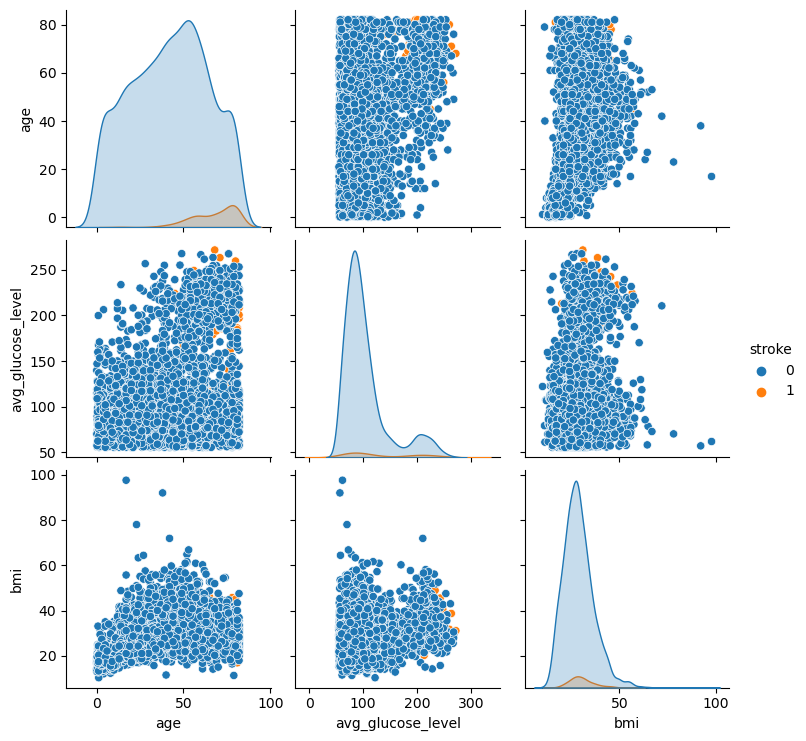

In [13]:
#plotting numerical data
num_cols=['age','avg_glucose_level','bmi']
plt.figure(figsize=(20,20))
sns.pairplot(stroke, hue='stroke',vars=num_cols)
plt.show()


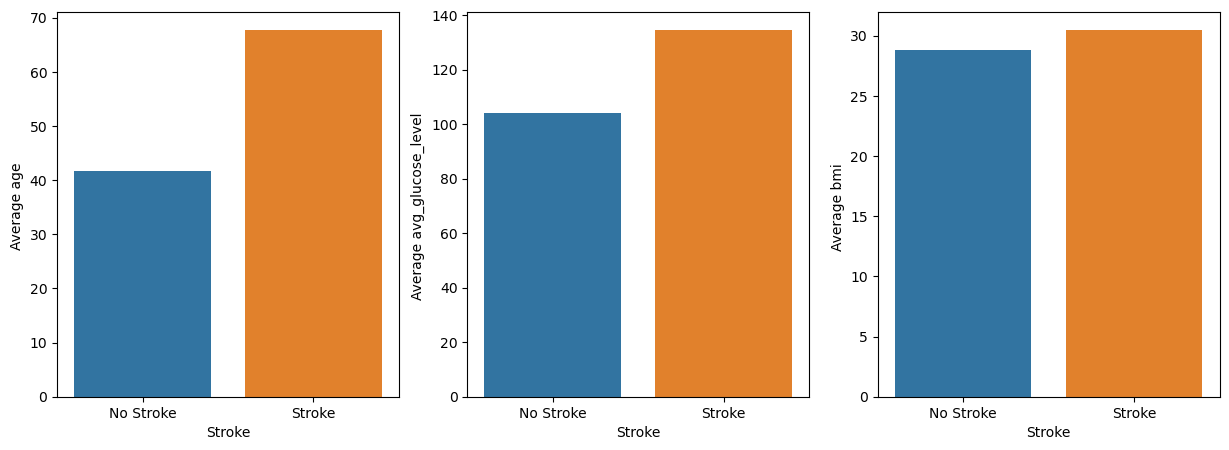

In [14]:
num_cols=['age','avg_glucose_level','bmi']
ratio_data=stroke.groupby('stroke')[num_cols].mean().reset_index()

plt.figure(figsize=(15,5))
    
for i in range(3):
    plt.subplot(1,3,i+1)
#   plt.title(f'Average {num_cols} for Stroke and Non Stroke Cases')

    sns.barplot(data=ratio_data, x='stroke',y=num_cols[i])
    plt.xlabel('Stroke')
    plt.ylabel(f'Average {num_cols[i]} ')
    plt.xticks([0,1],['No Stroke','Stroke'])

plt.show()

Conclusions: 
1. More Aged people are more likely to have a stroke than younger people
2. Similarly for higher avearage glucose level individuals there is greater probability of having a stroke
3. BMI does not seem to affect much on the probability of having a stroke or not 


### Identifying outliers

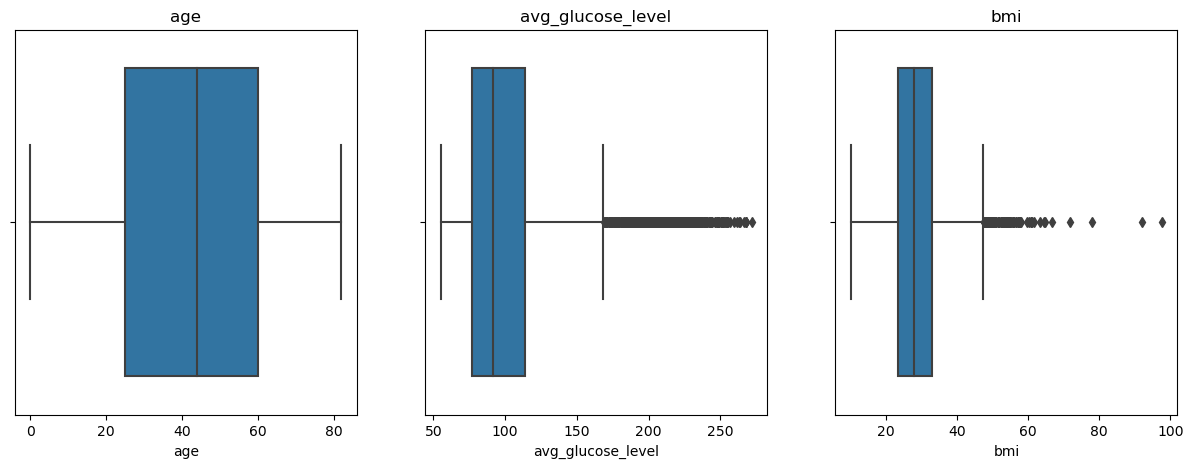

In [15]:
num_cols=['age','avg_glucose_level','bmi']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)
    
    sns.boxplot(x=stroke[num_cols[i]])
    plt.title(num_cols[i])
plt.show()

### Removing Outliers

In [16]:
def outliers(data,column):
    q1 = stroke[column].quantile(.25)
    q3 = stroke[column].quantile(.75)
    IQR = q3-q1
    
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
    ls = stroke.index[(stroke[column] <lower_bound) | (stroke[column] > upper_bound)]
    
    return ls

In [17]:
index_list = []

for column in num_cols:
    index_list.extend(outliers(stroke,column))

index_list = sorted(set(index_list))
index_list

[0,
 3,
 4,
 5,
 14,
 16,
 17,
 20,
 21,
 22,
 23,
 28,
 30,
 32,
 33,
 36,
 44,
 45,
 55,
 58,
 59,
 60,
 66,
 71,
 73,
 76,
 90,
 95,
 97,
 101,
 102,
 107,
 113,
 115,
 122,
 123,
 128,
 130,
 132,
 134,
 135,
 137,
 138,
 139,
 144,
 149,
 151,
 155,
 157,
 158,
 163,
 175,
 179,
 187,
 190,
 193,
 195,
 196,
 201,
 212,
 215,
 217,
 219,
 220,
 222,
 225,
 226,
 233,
 234,
 235,
 241,
 242,
 243,
 254,
 256,
 258,
 270,
 272,
 277,
 278,
 293,
 298,
 303,
 307,
 314,
 318,
 325,
 326,
 330,
 331,
 332,
 333,
 337,
 341,
 343,
 350,
 355,
 358,
 365,
 386,
 396,
 399,
 411,
 417,
 426,
 429,
 430,
 433,
 436,
 444,
 456,
 462,
 466,
 467,
 468,
 492,
 493,
 515,
 539,
 544,
 549,
 551,
 552,
 559,
 563,
 570,
 576,
 581,
 583,
 585,
 595,
 598,
 599,
 610,
 616,
 620,
 622,
 637,
 642,
 662,
 672,
 706,
 708,
 715,
 719,
 744,
 746,
 755,
 761,
 762,
 770,
 785,
 805,
 816,
 846,
 848,
 851,
 860,
 880,
 887,
 894,
 923,
 928,
 929,
 930,
 946,
 948,
 970,
 971,
 1003,
 1011,
 1059

In [18]:
before_remove = stroke.shape

stroke =stroke.drop(index_list)
after_remove = stroke.shape

print(f'''Shape of data before removing outliers : {before_remove}
Shape of data after remove : {after_remove}''')

Shape of data before removing outliers : (4909, 11)
Shape of data after remove : (4260, 11)


In [19]:
total_removed_outliers = before_remove[0] - after_remove[0]
print(f"Total removed outliers : {total_removed_outliers}")

Total removed outliers : 649


### Categorical data(Non-numerical)

In [20]:
categorical=stroke.select_dtypes(include=['object']).columns
categorical

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

For Non numerical columns, i.e ('gender','ever_married','work_type','Residence_type','smoking_status')

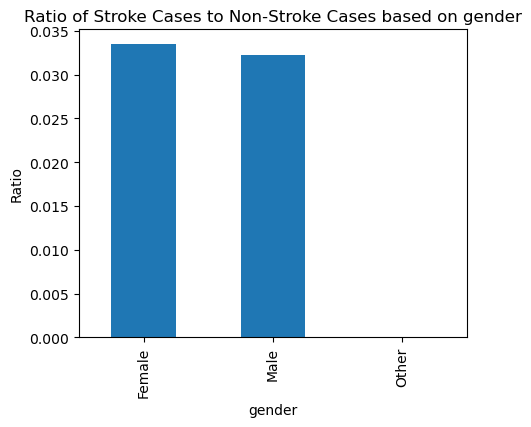

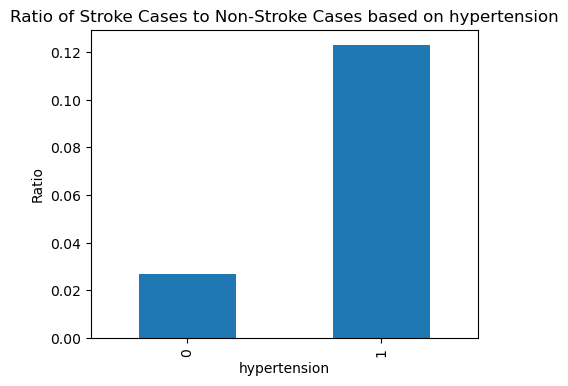

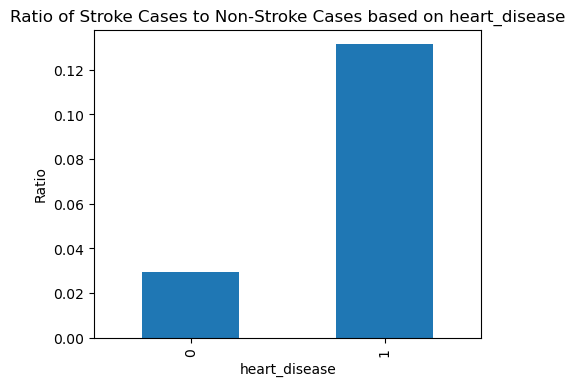

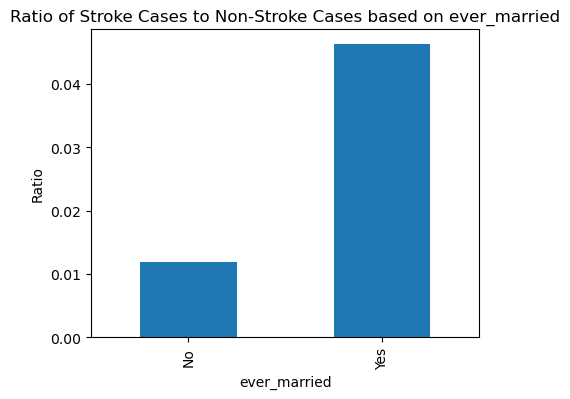

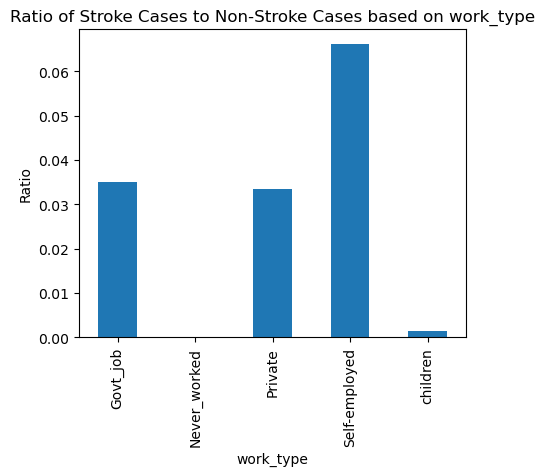

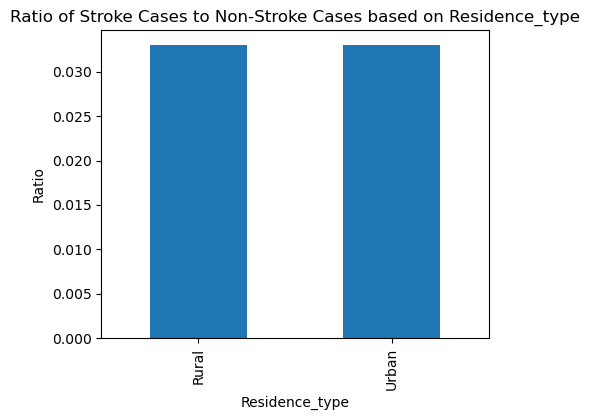

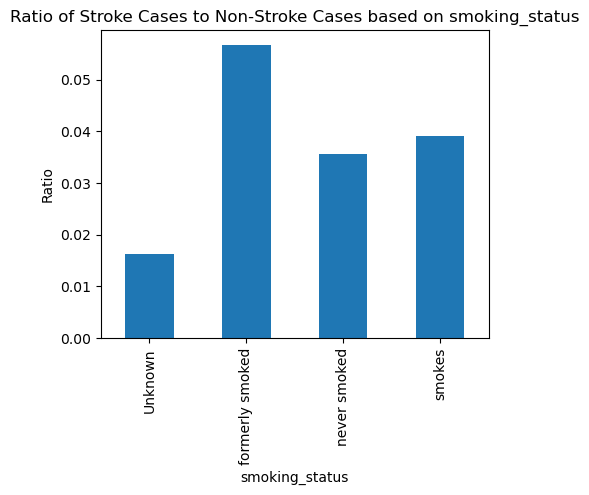

In [21]:
non_num=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in non_num:
    plt.figure(figsize=(5, 4))
    
    ratio = stroke.groupby([col, 'stroke']).size().unstack()
    
    ratio['ratio'] = ratio[1] / ratio[0]
    
    ratio['ratio'].plot(kind='bar')
    plt.title(f'Ratio of Stroke Cases to Non-Stroke Cases based on {col}')
    plt.xlabel(col)
    plt.ylabel('Ratio')
    plt.xticks(rotation=90)
    plt.show()

In [22]:
stroke=pd.get_dummies(data=stroke, columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)


In [23]:
stroke.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80.0,105.92,32.5,1,True,False,False,True,True,False,True,False,False,False,False,True,False
6,74.0,70.09,27.4,1,True,False,True,True,True,False,True,False,False,False,False,True,False
7,69.0,94.39,22.8,1,False,False,False,False,False,False,True,False,False,True,False,True,False
9,78.0,58.57,24.2,1,False,False,False,False,True,False,True,False,False,True,False,False,False
10,81.0,80.43,29.7,1,False,False,True,False,True,False,True,False,False,False,False,True,False


In [24]:
sel_col=['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status','age','avg_glucose_level']
columns=len(sel_col)
columns

7

### Spliting Data

In [25]:
X=stroke.drop('stroke', axis=1)
y=pd.to_numeric(stroke['stroke'])

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = .20)

In [26]:
print("X_train shape:", X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (3408, 16)
X_test shape: (852, 16)
y_train shape: (3408,)
y_test shape: (852,)


### Here the data is imbalanced.

## Data Preparation

In [27]:
!pip install --upgrade imbalanced-learn

In [28]:
#for balancing the data
from imblearn.over_sampling import SMOTE

In [29]:
smt = SMOTE(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

print('After Balancing:')
print('X_train balanced shape:', X_train.shape)
print('y_train balanced shape:', y_train.shape)

After Balancing:
X_train balanced shape: (6602, 16)
y_train balanced shape: (6602,)


### Now the data is balanced after using SMOTE library

### Standardizing the data

In [30]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X = scaler.fit_transform(X)


## Building Machine Learning Models 

In [31]:
##Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8908450704225352

In [33]:
from sklearn.metrics import accuracy_score
y_pred_lr = lr.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.8908450704225352

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

lr_precision=precision_score(y_test, y_pred_lr)
lr_recall=recall_score(y_test, y_pred_lr)
lr_f1=f1_score(y_test, y_pred_lr)
lr_acc=accuracy_score(y_test,y_pred_lr)

print(f"Accuracy: {lr_acc}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1-score: {lr_f1}")

Accuracy: 0.8908450704225352
Precision: 0.16666666666666666
Recall: 0.5517241379310345
F1-score: 0.256


In [35]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9272300469483568

In [36]:
from sklearn.metrics import accuracy_score
y_pred_dtc = dtc.predict(X_test)
accuracy_score(y_test, y_pred_dtc)

0.9272300469483568

In [37]:
dtc_precision=precision_score(y_test, y_pred_dtc)
dtc_recall=recall_score(y_test, y_pred_dtc)
dtc_f1=f1_score(y_test, y_pred_dtc)
dtc_acc=accuracy_score(y_test,y_pred_dtc)

print(f"Accuracy: {dtc_acc}")
print(f"Precision: {dtc_precision}")
print(f"Recall: {dtc_recall}")
print(f"F1-score: {dtc_f1}")

Accuracy: 0.9272300469483568
Precision: 0.0975609756097561
Recall: 0.13793103448275862
F1-score: 0.1142857142857143


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.954225352112676

### Going ahead with Random Forest Model

In [40]:
rf_model = RandomForestClassifier(n_estimators=150,criterion='entropy',random_state=123)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=123)

In [41]:
from sklearn.metrics import accuracy_score
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9518779342723005

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

rf_precision=precision_score(y_test, y_pred)
rf_recall=recall_score(y_test, y_pred)
rf_f1=f1_score(y_test, y_pred)
rf_acc=accuracy_score(y_test,y_pred)

print(f"Accuracy: {rf_acc}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-score: {rf_f1}")

Accuracy: 0.9518779342723005
Precision: 0.125
Recall: 0.06896551724137931
F1-score: 0.08888888888888889


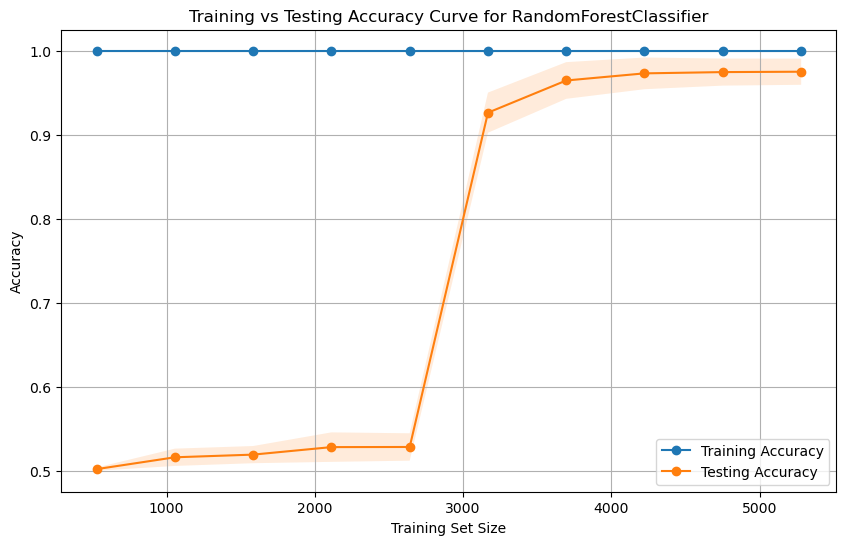

In [43]:
from sklearn.model_selection import learning_curve
rf_model.fit(X_train, y_train)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Testing Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title('Training vs Testing Accuracy Curve for RandomForestClassifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [44]:
print(f"Accuracy of Random Forest Classifier: {accuracy_score(y_test, y_pred)*100}%")

Accuracy of Random Forest Classifier: 95.18779342723005%


In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[809  14]
 [ 27   2]]


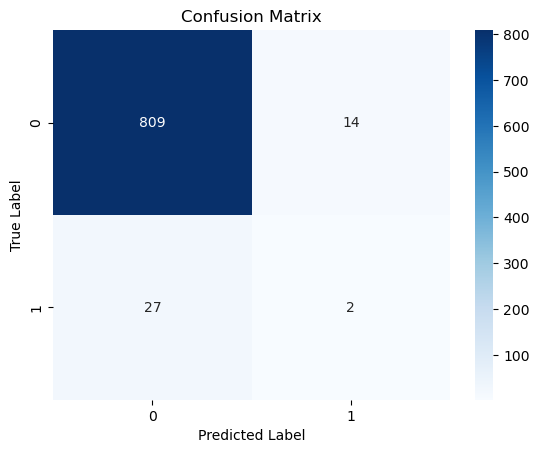

In [46]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [50]:
import joblib 

joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [51]:
joblib 


<module 'joblib' from 'C:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\joblib\\__init__.py'>